# HR-Analytics-Predicting-and-Understanding-Employee-Attrition

## 1 Phase - Data Management

0. To export datasets

In [278]:
import pandas as pd
import numpy as np

In [279]:
att = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Attrition.csv")


In [280]:
demo = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Demo.csv")


In [281]:
inc = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Income.csv")


In [282]:
det = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Job Details.csv")

1. We will fix issues and erros we have found, like datatype, blank cells and NaN.
2. We start checking empty value and if possible identifying which values.

In [283]:
# Counting how empty or blanks cells we have in our master data.
empty = inc.isna().sum().sum()
empty

2

In [284]:
b = inc[inc["EmpId"].isin([100015, 100038])]
b

EmpId  StandardHours  HourlyRate MonthlyIncome  PercentSalaryHike  \
14  100015            200         NaN                               14   
37  100038            200         NaN                               13   

    StockOptionLevel  
14                 0  
37                 0

In [285]:
# We use 0 Value, but we can drop both rows.
inc.loc[14, "MonthlyIncome"] = "0"
inc.loc[37, "MonthlyIncome"] = "0"
inc.loc[14, "HourlyRate"] = "0"
inc.loc[37, "HourlyRate"] = "0"
c = inc[inc["EmpId"].isin([100015, 100038])]
c

C:\Users\WENCESLAO\AppData\Local\Temp\ipykernel_142064\3110715961.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inc.loc[14, "HourlyRate"] = "0"


EmpId  StandardHours HourlyRate MonthlyIncome  PercentSalaryHike  \
14  100015            200          0             0                 14   
37  100038            200          0             0                 13   

    StockOptionLevel  
14                 0  
37                 0

In [286]:
# To find duplicates values
det.duplicated().sum()
duplicates = det[det.duplicated()]
duplicates

EmpId     BusinessTravel Department  JobLevel          JobRole  \
149  100145  Travel_Frequently      Sales         2  Sales Executive   

     JobSatisfaction  NumCompaniesWorked  PerformanceRating  StandardHours  \
149                4                   0                  3            200   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
149                  9                      2                4   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
149               8                   7                        0   

     YearsWithCurrManager OverTime  
149                     7       No

In [287]:
# To drop value that we will not use.
det = det.drop(index=148)


In [288]:
# We create a view to check if we have eliminated our duplicate row. Index will show our row deleted.
rows = det.iloc[[146,147,148,149]]
rows

EmpId     BusinessTravel              Department  JobLevel  \
146  100143      Travel_Rarely  Research & Development         2   
147  100144      Travel_Rarely  Research & Development         1   
149  100145  Travel_Frequently                   Sales         2   
150  100146      Travel_Rarely  Research & Development         1   

                JobRole  JobSatisfaction  NumCompaniesWorked  \
146  Research Scientist                3                   3   
147  Research Scientist                3                   1   
149     Sales Executive                4                   0   
150  Research Scientist                1                   5   

     PerformanceRating  StandardHours  TotalWorkingYears  \
146                  4            200                 19   
147                  3            200                  5   
149                  3            200                  9   
150                  3            200                  8   

     TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
146                      2                3               3   
147                      4                2               5   
149                      2                4               8   
150                      3                3               3   

     YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
146                   2                        2                     2   
147                   4                        0                     4   
149                   7                        0                     7   
150                   2                        2                     2   

    OverTime  
146      Yes  
147       No  
149       No  
150       No

3. We will merge att and demo. Then, inc and det.
4. We will create our master_data, followed by info().

In [289]:
new1 = pd.merge(att,demo, on = 'EmpId')

In [290]:
new2 = pd.merge(inc,det, on = 'EmpId')

In [291]:
master_data = pd.merge(new1,new2, on = 'EmpId')
pd.options.display.max_columns = 100
master_data.head(6)

EmpId Attrition            Department_x  Age  DistanceFromHome  Education  \
0  100001       Yes                   Sales   41                 1          2   
1  100002        No  Research & Development   49                 8          1   
2  100003       Yes  Research & Development   37                 2          2   
3  100004        No  Research & Development   33                 3          4   
4  100005        No  Research & Development   27                 2          1   
5  100006        No  Research & Development   32                 2          2   

  EducationField  Gender MaritalStatus  StandardHours_x HourlyRate  \
0  Life Sciences  Female        Single              200       30.0   
1  Life Sciences    Male       Married              200       26.0   
2          Other    Male        Single              200       10.0   
3  Life Sciences  Female       Married              200       15.0   
4        Medical    Male       Married              200       17.0   
5  Life Sciences    Male        Single              200       15.0   

  MonthlyIncome  PercentSalaryHike  StockOptionLevel     BusinessTravel  \
0          5993                 11                 0      Travel_Rarely   
1          5130                 23                 1  Travel_Frequently   
2          2090                 15                 0      Travel_Rarely   
3          2909                 11                 0  Travel_Frequently   
4          3468                 12                 1      Travel_Rarely   
5          3068                 13                 0  Travel_Frequently   

             Department_y  JobLevel                JobRole  JobSatisfaction  \
0                   Sales         2        Sales Executive                4   
1  Research & Development         2     Research Scientist                2   
2  Research & Development         1  Laboratory Technician                3   
3  Research & Development         1     Research Scientist                3   
4  Research & Development         1  Laboratory Technician                2   
5  Research & Development         1  Laboratory Technician                4   

   NumCompaniesWorked  PerformanceRating  StandardHours_y  TotalWorkingYears  \
0                   8                  3              200                  8   
1                   1                  4              200                 10   
2                   6                  3              200                  7   
3                   1                  3              200                  8   
4                   9                  3              200                  6   
5                   0                  3              200                  8   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   
5                      2                2               7                   7   

   YearsSinceLastPromotion  YearsWithCurrManager OverTime  
0                        0                     5      Yes  
1                        1                     7       No  
2                        0                     0      Yes  
3                        3                     0      Yes  
4                        2                     2       No  
5                        3                     6       No

# EXTRA EXTRA

In [292]:
#Binary¨: Attrition, Gender, OverTime

In [293]:
master_data["Attrition"] = master_data["Attrition"].apply(lambda x: 1 if x == 'Yes' else 0)
master_data["Gender"] = master_data["Gender"].apply(lambda x: 1 if x == 'Male' else 0)
master_data["OverTime"] = master_data["OverTime"].apply(lambda x: 1 if x == 'Yes' else 0)

In [294]:
master_data.Education.value_counts()
master_data.JobLevel.value_counts()
master_data.JobRole.value_counts()
master_data.StandardHours_x.value_counts()
master_data.StockOptionLevel.value_counts()
master_data.MaritalStatus.value_counts()
master_data.BusinessTravel.value_counts()
master_data.EducationField.value_counts()
master_data.Education.value_counts()

Education
3    573
4    398
2    285
1    170
5     49
Name: count, dtype: int64

We will create extra columns based on: BusinessTravel, Departmen_x, EducationField, JobRole, MaritalStatus (Boolean whichi will be later converted to numerical values)

In [295]:
master_data = master_data.join(pd.get_dummies(master_data["BusinessTravel"])).drop('BusinessTravel', axis=1)
master_data = master_data.join(pd.get_dummies(master_data["Department_x"], prefix='Department')).drop('Department_x', axis=1)
master_data = master_data.join(pd.get_dummies(master_data["EducationField"], prefix='EducationField')).drop('EducationField', axis=1)
master_data = master_data.join(pd.get_dummies(master_data["JobRole"], prefix='JobR')).drop('JobRole', axis=1)
master_data = master_data.join(pd.get_dummies(master_data["MaritalStatus"], prefix='MaritalStat')).drop('MaritalStatus', axis=1)

6. Finally, we detect our attrition rate using the formula and obtaining a %

In [296]:
# Boolean being managed
master_data = master_data.map(lambda x: 1 if x is True else 0 if x is False else x)
master_data.sample(3)

EmpId  Attrition  Age  DistanceFromHome  Education  Gender  \
1151  101147          0   34                10          4       1   
833   100829          1   18                 8          1       1   
947   100943          0   36                10          4       0   

      StandardHours_x HourlyRate MonthlyIncome  PercentSalaryHike  \
1151              200       24.0          4724                 13   
833               200       10.0          1904                 12   
947               200       35.0          7094                 12   

      StockOptionLevel            Department_y  JobLevel  JobSatisfaction  \
1151                 1  Research & Development         2                4   
833                  0  Research & Development         1                3   
947                  0  Research & Development         3                3   

      NumCompaniesWorked  PerformanceRating  StandardHours_y  \
1151                   1                  3              200   
833                    1                  3              200   
947                    3                  3              200   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
1151                  9                      3                3   
833                   0                      0                3   
947                  10                      0                3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
1151               9                   7                        7   
833                0                   0                        0   
947                7                   7                        1   

      YearsWithCurrManager  OverTime  Non-Travel  Travel_Frequently  \
1151                     2         0           0                  1   
833                      0         0           1                  0   
947                      7         0           0                  0   

      Travel_Rarely  Department_Human Resources  \
1151              0                           0   
833               0                           0   
947               1                           0   

      Department_Research & Development  Department_Sales  \
1151                                  1                 0   
833                                   1                 0   
947                                   1                 0   

      EducationField_Human Resources  EducationField_Life Sciences  \
1151                               0                             1   
833                                0                             0   
947                                0                             0   

      EducationField_Marketing  EducationField_Medical  EducationField_Other  \
1151                         0                       0                     0   
833                          0                       1                     0   
947                          0                       0                     0   

      EducationField_Technical Degree  JobR_Healthcare Representative  \
1151                                0                               0   
833                                 0                               0   
947                                 1                               1   

      JobR_Human Resources  JobR_Laboratory Technician  JobR_Manager  \
1151                     0                           0             0   
833                      0                           1             0   
947                      0                           0             0   

      JobR_Manufacturing Director  JobR_Research Director  \
1151                            1                       0   
833                             0                       0   
947                             0                       0   

      JobR_Research Scientist  JobR_Sales Executive  \
1151                        0                     0   
833                         0                     0   
947         

In [297]:
# Repeated values in Department_x and Department_y. We will drop one of them.
master_data = master_data.drop('Department_y', axis=1)
# Empid does not give us any valuable information
master_data = master_data.drop('EmpId', axis=1)
# There are two variables: StandarHours_x and StandardHours_y which do not give us any valuable information.
master_data = master_data.drop('StandardHours_x', axis=1)
master_data = master_data.drop('StandardHours_y', axis=1)

In [298]:
master_data.sample(2)

Attrition  Age  DistanceFromHome  Education  Gender HourlyRate  \
706          0   53                 2          2       1       74.0   
145          0   45                29          3       1       17.0   

    MonthlyIncome  PercentSalaryHike  StockOptionLevel  JobLevel  \
706         14852                 13                 1         4   
145          3452                 13                 0         1   

     JobSatisfaction  NumCompaniesWorked  PerformanceRating  \
706                3                   6                  3   
145                4                   5                  3   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
706                 22                      3                4   
145                  9                      2                2   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
706              17                  13                       15   
145               6                   5                        0   

     YearsWithCurrManager  OverTime  Non-Travel  Travel_Frequently  \
706                     2         0           0                  0   
145                     3         0           0                  0   

     Travel_Rarely  Department_Human Resources  \
706              1                           0   
145              1                           0   

     Department_Research & Development  Department_Sales  \
706                                  0                 1   
145                                  1                 0   

     EducationField_Human Resources  EducationField_Life Sciences  \
706                               0                             0   
145                               0                             0   

     EducationField_Marketing  EducationField_Medical  EducationField_Other  \
706                         0                       1                     0   
145                         0                       1                     0   

     EducationField_Technical Degree  JobR_Healthcare Representative  \
706                                0                               0   
145                                0                               0   

     JobR_Human Resources  JobR_Laboratory Technician  JobR_Manager  \
706                     0                           0             1   
145                     0                           0             0   

     JobR_Manufacturing Director  JobR_Research Director  \
706                            0                       0   
145                            0                       0   

     JobR_Research Scientist  JobR_Sales Executive  JobR_Sales Representative  \
706                        0                     0                          0   
145                        1                     0                          0   

     MaritalStat_Divorced  MaritalStat_Married  MaritalStat_Single  
706                     1                    0                   0  
145                     0                    0                   1

5. Datatype is incorrect for MonthlyIncome and HourlyRate. We proceed to change it as float

In [299]:
master_data["MonthlyIncome"] = master_data["MonthlyIncome"].astype("int64")
master_data["HourlyRate"] = master_data["HourlyRate"].astype("int64")
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition                          1475 non-null   int64
 1   Age                                1475 non-null   int64
 2   DistanceFromHome                   1475 non-null   int64
 3   Education                          1475 non-null   int64
 4   Gender                             1475 non-null   int64
 5   HourlyRate                         1475 non-null   int64
 6   MonthlyIncome                      1475 non-null   int64
 7   PercentSalaryHike                  1475 non-null   int64
 8   StockOptionLevel                   1475 non-null   int64
 9   JobLevel                           1475 non-null   int64
 10  JobSatisfaction                    1475 non-null   int64
 11  NumCompaniesWorked                 1475 non-null   int64
 12  PerformanceRating   

In [300]:
# las dos columans que faltan estan abajo porque no las he ejecutado todavia jaja
# How to eliminate outliers y fino señores

In [301]:
# Reffered to Outliers

In [302]:
# Calculate Q1, Q3 and IQR
Q1 = master_data["MonthlyIncome"].quantile(0.25)
Q3 = master_data["MonthlyIncome"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = master_data[(master_data["MonthlyIncome"] < lower_bound) | 
                       (master_data["MonthlyIncome"] > upper_bound)]

print("Outliers detected:\n", outliers[["MonthlyIncome"]])


Outliers detected:
       MonthlyIncome
20           154270
24           119940
27            19094
31            18947
47            19545
...             ...
1379          17875
1382          19161
1406          19636
1442          19431
1448          18880

[117 rows x 1 columns]


In [303]:
master_data = master_data.drop([20, 24])


In [304]:
# Quick visualization
import matplotlib.pyplot as plt

master_data.hist(figsize=(24,15))
plt.show()

In [305]:
attrition_rate = (master_data['Attrition'].value_counts()[1] / len(master_data)) * 100

print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

Overall Attrition Rate: 16.16%


## 2 Phase - Data Analysis

1. We will select the items which could give us a meaningful result using Whisker-Box Plot
In this case: 
Age, 
DistanceFromHome, 
HourlyRate, 
MonthlyIncome, 
TotalWorkingYears, 
NumCompaniesWorked, 
YearsAtCompany, 
YearsInCurrentRole, 
YearsSinceLastPromotion, 
YearsWithCurrManager, 
TrainingTimesLastYear


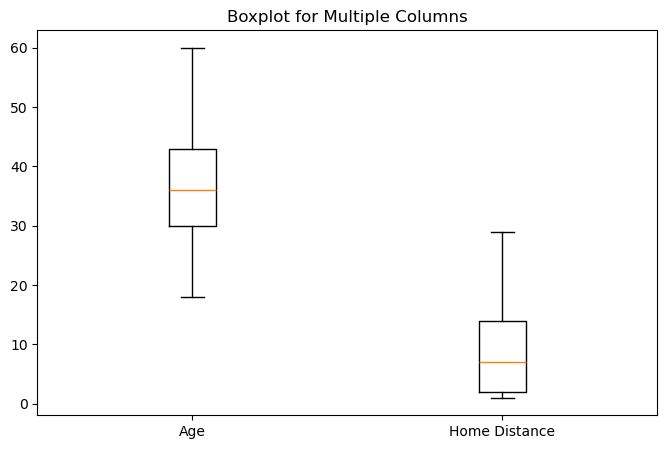

In [306]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot([master_data['Age'], master_data['DistanceFromHome']], labels=['Age', 'Home Distance'])
plt.title('Boxplot for Multiple Columns')
plt.show()


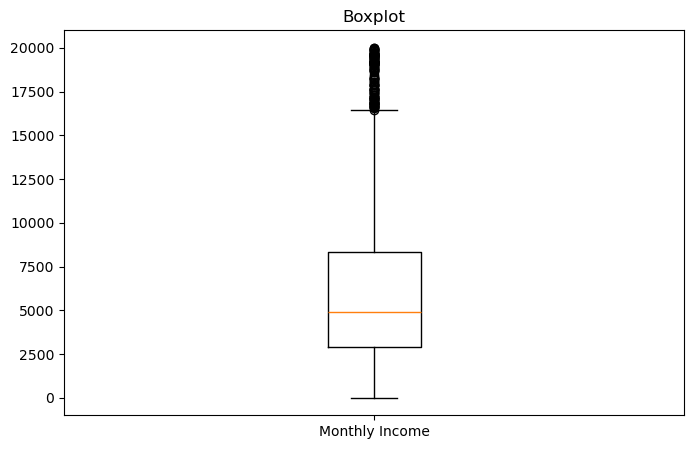

In [307]:
plt.figure(figsize=(8,5))
plt.boxplot(master_data['MonthlyIncome'], labels=['Monthly Income'])
plt.title('Boxplot')
plt.show()

In [308]:
plt.figure(figsize=(8,5))
plt.boxplot([master_data['TotalWorkingYears'], master_data['NumCompaniesWorked']], labels=['Total Working years', '# Previous Companies'])
plt.title('Boxplot for Multiple Columns')
plt.show()

In [309]:
plt.figure(figsize=(13,5))
plt.boxplot([master_data['YearsAtCompany'], master_data['YearsInCurrentRole'], master_data['YearsSinceLastPromotion'],master_data['YearsWithCurrManager']
,master_data['TrainingTimesLastYear']], labels=['Years Company', 'Years Role','Years Last Promotion','Years w. Manager','Training Times Last Year'])
plt.title('Boxplot for Multiple Columns')
plt.show()

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt

2. Box Whisker plot grouped by attrition:


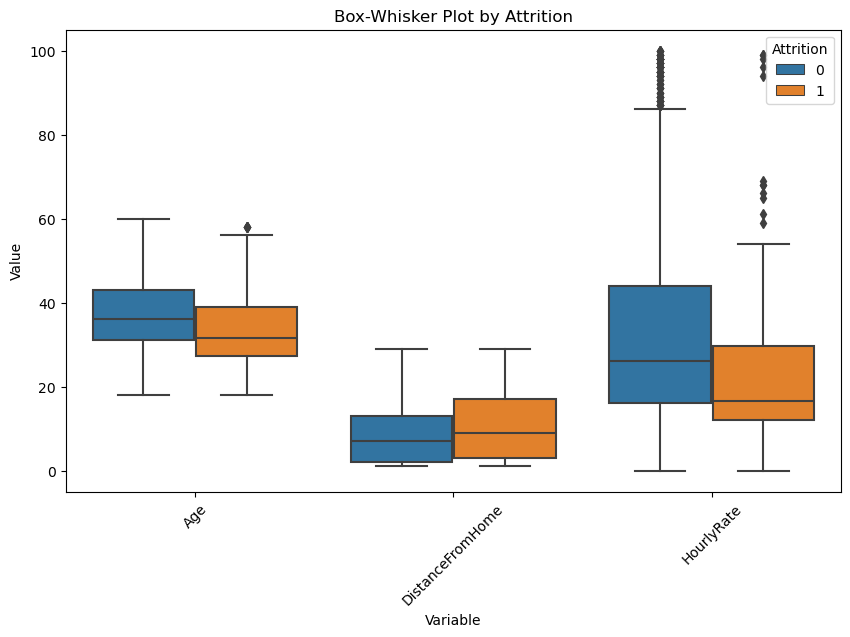

In [311]:
# We will identify a number of numeric_cols
numeric_cols = ['Age','DistanceFromHome','HourlyRate']

# Melt dataframe for seaborn
df_melted = master_data.melt(id_vars='Attrition', value_vars=numeric_cols, var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Variable', y='Value', hue='Attrition', data=df_melted)
plt.title('Box-Whisker Plot by Attrition')
plt.xticks(rotation=45)  # rotate labels if many variables
plt.show()



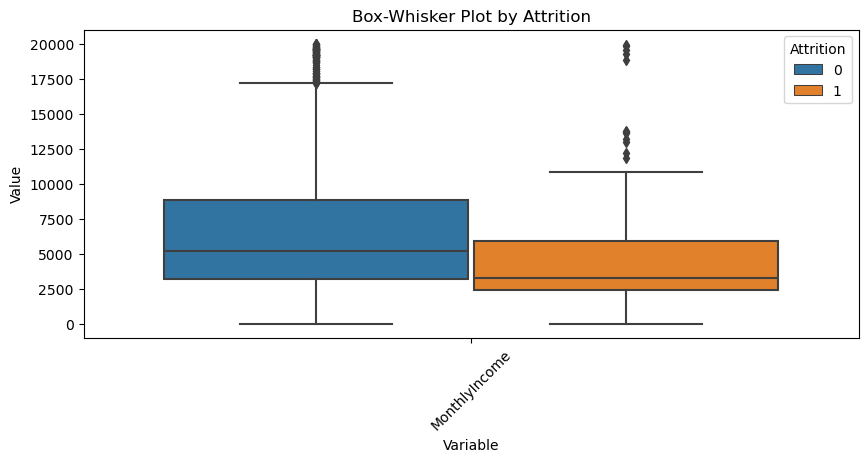

In [312]:
# We will identify a number of numeric_cols
numeric_cols2 = ['MonthlyIncome']

# Melt dataframe for seaborn
df_melted = master_data.melt(id_vars='Attrition', value_vars=numeric_cols2, var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(10,4))
sns.boxplot(x='Variable', y='Value', hue='Attrition', data=df_melted)
plt.title('Box-Whisker Plot by Attrition')
plt.xticks(rotation=45)  # rotate labels if many variables
plt.show()

In [313]:
# We will identify a number of numeric_cols
numeric_cols3 = ['TotalWorkingYears', 'NumCompaniesWorked', 'YearsAtCompany']

# Melt dataframe for seaborn
df_melted = master_data.melt(id_vars='Attrition', value_vars=numeric_cols3, var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Variable', y='Value', hue='Attrition', data=df_melted)
plt.title('Box-Whisker Plot by Attrition')
plt.xticks(rotation=45)  # rotate labels if many variables
plt.show()

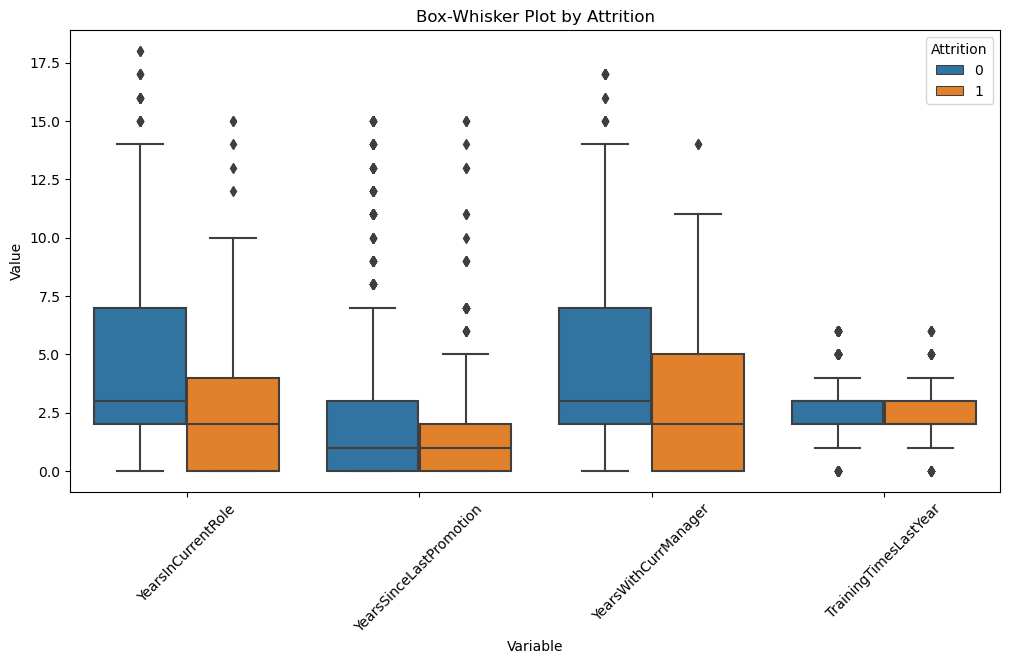

In [314]:
# We will identify a number of numeric_cols
numeric_cols4 = ['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear']

# Melt dataframe for seaborn
df_melted = master_data.melt(id_vars='Attrition', value_vars=numeric_cols4, var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Variable', y='Value', hue='Attrition', data=df_melted)
plt.title('Box-Whisker Plot by Attrition')
plt.xticks(rotation=45)  # rotate labels if many variables
plt.show()

In [315]:
# Considering our new master data, above we should change the things based on the rest of numericals or not, it will depende on us.

# Mean of numeric variables.

In [316]:
# Group by Attrition (0/1) and take the mean of numeric columns
# We create group of columns in order to have a better visualization. 
sel_cols = ['Age', 'DistanceFromHome', 'Education', 'Gender', 'HourlyRate', 'PercentSalaryHike', 'StockOptionLevel', 'JobLevel', 'JobSatisfaction','NumCompaniesWorked'] 
sel_cols2 = ['PerformanceRating', 'TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager', 'OverTime']
sel_new_col = ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobR_Healthcare Representative', 'JobR_Human Resources', 'JobR_Laboratory Technician', 'JobR_Manager', 'JobR_Manufacturing Director', 'JobR_Research Director', 'JobR_Research Scientist', 'JobR_Sales Executive', 'JobR_Sales Representative', 'MaritalStat_Divorced', 'MaritalStat_Married', 'MaritalStat_Single']

the_mean = master_data.groupby("Attrition")[sel_cols].mean()
the_mean2 = master_data.groupby("Attrition")[sel_cols2].mean()
the_mean3 = master_data.groupby("Attrition")[sel_new_col].mean()

# Plot as bar chart
the_mean.T.plot(kind="bar", figsize=(12,8))
plt.title("Mean of Numeric Variables by Attrition (0=No, 1=Yes)")
plt.ylabel("Mean Value")
plt.xlabel("Numeric Variables")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.show()



In [317]:
# Plot as bar chart
the_mean2.T.plot(kind="bar", figsize=(12,8))
plt.title("Mean of Numeric Variables by Attrition (0=No, 1=Yes)")
plt.ylabel("Mean Value")
plt.xlabel("Numeric Variables")
plt.xticks(rotation=30)
plt.legend(title="Attrition")
plt.show()


In [318]:
# Plot as bar chart
the_mean3.T.plot(kind="bar", figsize=(24,8))
plt.title("Mean of Numeric Variables by Attrition (0=No, 1=Yes)")
plt.ylabel("Mean Value")
plt.xlabel("Extra Variables")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.show()

In [319]:
income = ['MonthlyIncome']
the_mean4 = master_data.groupby("Attrition")[income].mean()

# Plot as bar chart
the_mean4.T.plot(kind="bar", figsize=(7,6))
plt.title("Mean of Numeric Variables by Attrition (0=No, 1=Yes)")
plt.ylabel("Mean Value")
plt.xlabel("Numeric Variables")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.show()

In [320]:
# We are just creating copies for our models, to run in thosse df.
master_data_1 = master_data.copy()
master_data_2 = master_data.copy()
master_data_3 = master_data.copy()
master_data_4 = master_data.copy()
master_data_5 = master_data.copy()

We create our heatmap based on montlyincome and joblevel

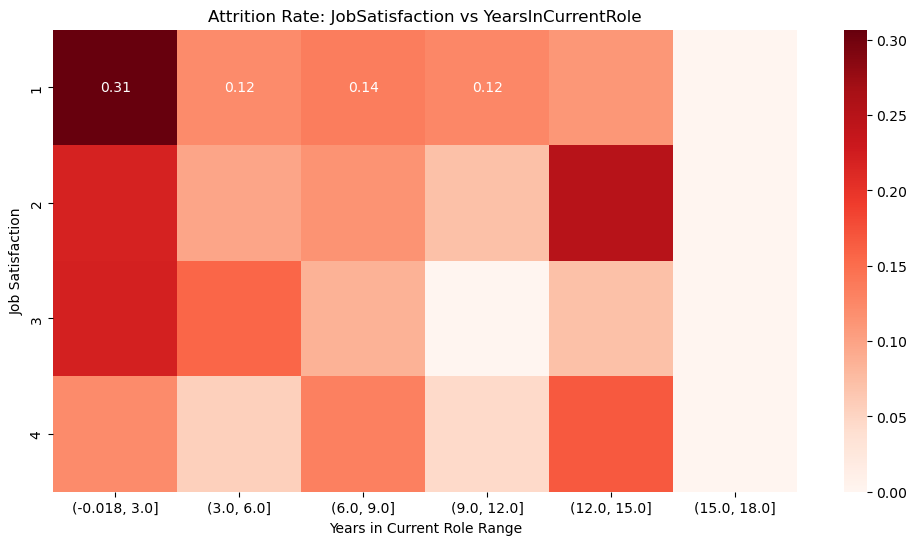

In [321]:

# Crear bins para YearsInCurrentRole para que el heatmap sea legible
master_data['YearsInRoleBin'] = pd.cut(master_data['YearsInCurrentRole'], bins=6)  # 5 rangos de años

# Pivot table: promedio de Attrition (0/1) = tasa de attrition
pivot_table = master_data.pivot_table(
    index='JobSatisfaction',
    columns='YearsInRoleBin',
    values='Attrition',
    aggfunc='mean'
)

# Dibujar el heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="Reds")
plt.title("Attrition Rate: JobSatisfaction vs YearsInCurrentRole")
plt.ylabel("Job Satisfaction")
plt.xlabel("Years in Current Role Range")
plt.show()


In [322]:
# Chris, yoou have to give exaplantaios about this ehatmpa. related with the wtwo bvariables, I would say select the max value and the one in red.and the second one in red.

# 3 PHASE

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = master_data_1.drop('Attrition', axis=1), master_data_1['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

THIS IS A RANDOMFORESTCLASSIFIER IN A SIMPLER VERSION


In [324]:
model.score(X_test, y_test)

0.864406779661017

In [325]:
model.feature_importances_

array([0.07233404, 0.06313097, 0.02397282, 0.01331822, 0.05995806,
       0.07915002, 0.0392997 , 0.03096782, 0.0182188 , 0.0305436 ,
       0.03896082, 0.02415771, 0.05499649, 0.03049717, 0.03174919,
       0.0486366 , 0.03274179, 0.0300358 , 0.03955738, 0.05966941,
       0.00435008, 0.01658937, 0.009886  , 0.00296183, 0.00993759,
       0.01050048, 0.00155117, 0.01031051, 0.00901457, 0.00977093,
       0.00548284, 0.00708716, 0.00253104, 0.00317542, 0.00985599,
       0.00128706, 0.00401441, 0.00074912, 0.00872753, 0.00806089,
       0.00804733, 0.00810321, 0.0104532 , 0.01565588])

In [326]:
sorted_importances = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse = True))

In [327]:
plt.figure(figsize=(20,8))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [328]:
''' DIVISION PARA CREAR BINARY LOGISTIC REGRESSION'''

' DIVISION PARA CREAR BINARY LOGISTIC REGRESSION'

In [329]:
master_data_2.columns
master_data_2.sample()
# Change ‘AGE’ variable into categorical
master_data_5['Age'] = master_data_5['Age'].astype('category')


x_variables =['Age', 'DistanceFromHome', 'Education', 'Gender',
       'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',
       'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'OverTime',
       'Non-Travel', 'Travel_Frequently', 'Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobR_Healthcare Representative',
       'JobR_Human Resources', 'JobR_Laboratory Technician', 'JobR_Manager',
       'JobR_Manufacturing Director', 'JobR_Research Director',
       'JobR_Research Scientist', 'JobR_Sales Executive',
       'JobR_Sales Representative', 'MaritalStat_Divorced',
       'MaritalStat_Married', 'MaritalStat_Single']
X = master_data_2.loc[:,x_variables]
y = master_data_2.loc[:,'Attrition']

# When we create dummies, we do not use all the new columns created. One should be eliminated. 

In [330]:
x_variables =['Age', 'DistanceFromHome', 'Education', 'Gender',
       'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',
       'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'OverTime','Travel_Frequently', 'Travel_Rarely',
       'Department_Research & Development','Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing','EducationField_Medical',
       'EducationField_Technical Degree', 'JobR_Healthcare Representative',
       'JobR_Human Resources', 'JobR_Laboratory Technician', 'JobR_Manager',
       'JobR_Manufacturing Director', 'JobR_Research Director',
       'JobR_Research Scientist', 'JobR_Sales Representative', 'MaritalStat_Divorced',
       'MaritalStat_Married']
X = master_data_2.loc[:,x_variables]
y = master_data_2.loc[:,'Attrition']

# When we create dummies, we do not use all the new columns created. One should be eliminated. 

Deparment_sales y Hourlyrate eliminados por la multicolinearidad

In [331]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 0)

In [332]:
y_train.shape

(1178,)

In [333]:
master_data_2.shape

(1473, 45)

In [334]:
# sigue estando mal porque tiene categoricos y no hay que coger todos los dummies, mirar video de youtube. Esta no srive porque OLS hace otra cosa y no esta relacionada con esto. 

In [336]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)  # add intercept
Logit_model = sm.Logit(y_train, X_train_const).fit()
print(logit_model.summary())

         Current function value: 0.298825
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1178
Model:                          Logit   Df Residuals:                     1163
Method:                           MLE   Df Model:                           14
Date:                Tue, 16 Sep 2025   Pseudo R-squ.:                  0.2430
Time:                        23:19:40   Log-Likelihood:                -398.92
converged:                       True   LL-Null:                       -526.99
Covariance Type:            nonrobust   LLR p-value:                 1.543e-46
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.4075      0.518      2.719      0.007       0.393       2.422
Di

C:\Users\WENCESLAO\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


'''
As we can detect some insignificant variables. Also, we will eliminate one of our variables between Monthlyincome and HourlyRate, because
we have detected a high level of multicolinearity. 
'''

In [275]:
x_variables_significant =['DistanceFromHome',
       'MonthlyIncome', 'JobSatisfaction', 'NumCompaniesWorked','TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'EducationField_Technical Degree',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'OverTime','Travel_Frequently', 'MaritalStat_Divorced',
       'MaritalStat_Married']
X_sigf = master_data_2.loc[:,x_variables]
y_sigf = master_data_2.loc[:,'Attrition']

In [276]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sigf, y_sigf, test_size=0.20,random_state = 0)

In [277]:
import statsmodels.api as sm

X_train_const_s = sm.add_constant(X_train_s)  # agregar intercepto
logit_model_s = sm.Logit(y_train, X_train_const_s).fit()
print(logit_model_s.summary())

         Current function value: 0.298825
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1178
Model:                          Logit   Df Residuals:                     1138
Method:                           MLE   Df Model:                           39
Date:                Tue, 16 Sep 2025   Pseudo R-squ.:                  0.3320
Time:                        23:18:26   Log-Likelihood:                -352.02
converged:                      False   LL-Null:                       -526.99
Covariance Type:            nonrobust   LLR p-value:                 1.290e-51
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -12.4350   1702.937     -0.007      0.994   -3350.130    3325.

C:\Users\WENCESLAO\ANACONDA\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#We check multicolinearity following the next point as references:

VIF = 1 → There is no multicolinearity

VIF entre 1 y 5 → Moderate multicolinearity, generally accepted.

VIF > 5 → High multicolinearity, to check variable.

In [337]:
#We check multicolinearity following the next point as references:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train_const.values, i)
    for i in range(X_train_const.shape[1])
]

print(vif_data)


                              feature          VIF
0                               const   350.090785
1                                 Age     2.146854
2                    DistanceFromHome     1.027152
3                           Education     1.095265
4                              Gender     1.040791
5                          HourlyRate  6965.038332
6                       MonthlyIncome  7014.232053
7                   PercentSalaryHike     1.524270
8                    StockOptionLevel     1.932188
9                            JobLevel    14.402749
10                    JobSatisfaction     1.170925
11                 NumCompaniesWorked     1.296728
12                  PerformanceRating     1.756995
13                  TotalWorkingYears     5.036855
14              TrainingTimesLastYear     1.041114
15                    WorkLifeBalance     1.042105
16                     YearsAtCompany     4.723958
17                 YearsInCurrentRole     2.714867
18            YearsSinceLastPro

In [139]:
# TRAIN DATA- We will obtain AUC and ROC 

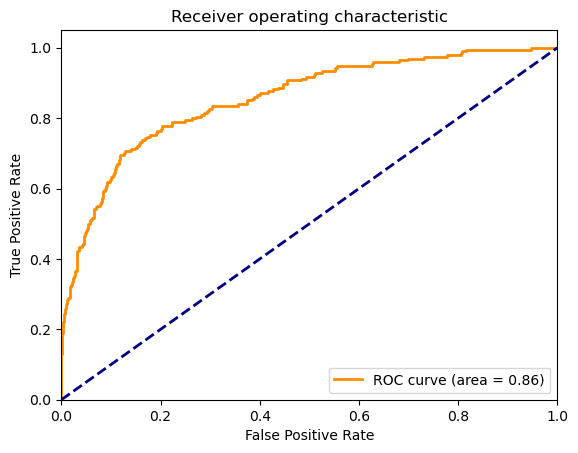

In [186]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

y_pred_probtrain = logreg.predict_proba(X_train)[::,1]
fpr, tpr, thresholds =roc_curve(y_train,y_pred_probtrain)
roc_auc = auc(fpr, tpr)

ruc_auc = auc(fpr,tpr)

plt.figure();
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % ruc_auc);
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--');
plt.xlim([0.0, 1.0]);plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate');
plt.title('Receiver operating characteristic');plt.legend(loc="lower right");
plt.show()

6.	Obtain classification table and accuracy (%)

In [187]:
predicted_values1=logreg.predict_proba(X_train)[::,1]
threshold=0.5
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1

from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_class1))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       984
           1       0.72      0.39      0.51       194

    accuracy                           0.87      1178
   macro avg       0.80      0.68      0.72      1178
weighted avg       0.86      0.87      0.86      1178



7.	Obtain threshold to balance sensitivity and specificity(note that default threshold is 0.5)

In [160]:
fpr, tpr, thresholds =roc_curve(y_train,y_pred_probtrain)
roc_auc = auc(fpr, tpr)

i = np.arange(len(tpr)) 
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = roc.iloc[optimal_idx][4]
optimal_threshold

C:\Users\WENCESLAO\AppData\Local\Temp\ipykernel_142064\539982160.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  optimal_threshold = roc.iloc[optimal_idx][4]


0.2454703631014698

TRAIN DATA - Optimal threshold

In [162]:
predicted_values1=logreg.predict_proba(X_train)[::,1]
threshold=optimal_threshold
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1

from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_class1))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       984
           1       0.52      0.70      0.60       194

    accuracy                           0.84      1178
   macro avg       0.73      0.79      0.75      1178
weighted avg       0.87      0.84      0.85      1178



TEST DATA - Optimal Threshold (comparison between TRAIN DATA with optimal threshold)

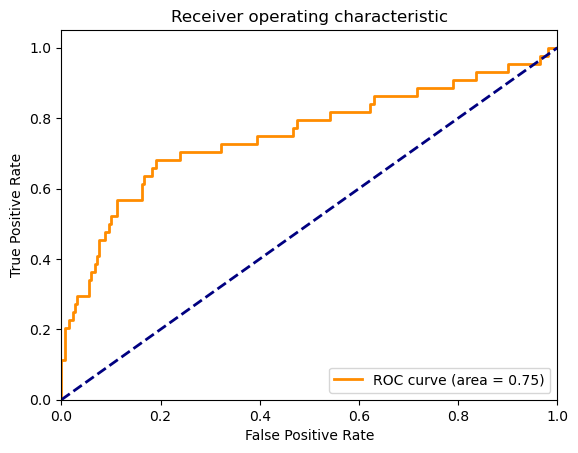

In [189]:
y_pred_probtrain = logreg.predict_proba(X_test)[::,1]
fpr, tpr, thresholds =roc_curve(y_test,y_pred_probtrain)
roc_auc = auc(fpr, tpr)

ruc_auc = auc(fpr,tpr)

plt.figure();
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % ruc_auc);
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--');
plt.xlim([0.0, 1.0]);plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate');
plt.title('Receiver operating characteristic');plt.legend(loc="lower right");
plt.show()

In [164]:
predicted_values1=logreg.predict_proba(X_test)[::,1]
threshold=optimal_threshold
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1

print(classification_report(y_test,predicted_class1))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       251
           1       0.39      0.64      0.49        44

    accuracy                           0.80       295
   macro avg       0.66      0.73      0.68       295
weighted avg       0.85      0.80      0.82       295



The Area Under ROC Curve (AUC) for train and test data indicate that the model is stable and performed well on test data. The sensitivity value using optimum threshold is 64% for test data

Note: Recall or Sensitivity , Precision and Accuracy (To check concepts or add it to the note)

In [ ]:
variables train data, test data y luego variable coded significantes (creo que solo el train de esas)

esto es el tercero con las variables significates. pero no me sale no se porque

y_pred_probtrain_s = logreg.predict_proba(X_train_s)[::,1]
fpr, tpr, thresholds =roc_curve(y_train_s,y_pred_probtrain_s)
roc_auc = auc(fpr, tpr)

ruc_auc = auc(fpr,tpr)

plt.figure();
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % ruc_auc);
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--');
plt.xlim([0.0, 1.0]);plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate');
plt.title('Receiver operating characteristic');plt.legend(loc="lower right");
plt.show()